# CNN

### References:
1. https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99

In [1]:
import os
import time

import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

Using TensorFlow backend.


In [3]:
train_file = ".\\input\\train.csv"
test_file = ".\\input\\test.csv"
# output_file = ".\\output\\submission.csv"

In [4]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(raw_data[:,1:], raw_data[:,0], test_size=0.1)

Text(0.5,1,'28x28 data')

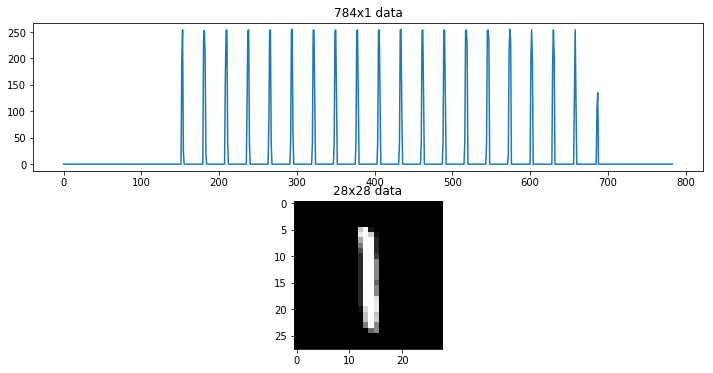

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

(37800, 28, 28, 1)
(37800, 28, 28, 1)
(28, 28, 1)


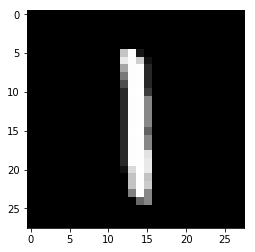

In [68]:
print(x_train.shape)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_train[0].shape)
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

In [7]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [8]:
print(y_train[0])
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


In [9]:
def build_model(input_shape):
    model = Sequential()
    # Block 1
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding = 'Same', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(strides=(2,2)))
    model.add(Dropout(0.25))
    # Block 2
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(strides=(2,2)))
    model.add(Dropout(0.25))

    # Output
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [10]:
model = build_model(x_train.shape[1:])
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
__________

In [12]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    rotation_range = 20,
    height_shift_range = 0.2,
    width_shift_range = 0.2
)

val_datagen = ImageDataGenerator()

In [13]:
annealer = LearningRateScheduler(lambda x: 1e-4 * 0.995 ** x)

# def get_lr(x):
#     lr = round(1e-4 * 0.995 ** x, 6)
#     if lr < 5e-5:
#         lr = 5e-5
#     print(lr, end='  ')
#     return lr
# annealer = LearningRateScheduler(get_lr)

callbacks = [annealer]

In [14]:
%%time
batch_size = 128
steps_per_epoch = x_train.shape[0] / batch_size
hist = model.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=batch_size, seed=2018),
    steps_per_epoch=steps_per_epoch,
    epochs=20, #Increase this when not on Kaggle kernel
    verbose=1,  #1 for ETA, 0 for silent
    callbacks=callbacks,
    max_queue_size=256,
    workers=32,
    validation_steps=1000,
    validation_data=val_datagen.flow(x_val, y_val, batch_size=32, seed=2018)
)

Epoch 1/20
296/295 [==============================] - 112s 378ms/step - loss: 1.4836 - acc: 0.5065 - val_loss: 5.5763 - val_acc: 0.1117
Epoch 2/20
296/295 [==============================] - 109s 367ms/step - loss: 0.6238 - acc: 0.7962 - val_loss: 0.3637 - val_acc: 0.8895
Epoch 3/20
296/295 [==============================] - 109s 368ms/step - loss: 0.4127 - acc: 0.8696 - val_loss: 0.1246 - val_acc: 0.9627
Epoch 4/20
296/295 [==============================] - 109s 367ms/step - loss: 0.3233 - acc: 0.8979 - val_loss: 0.1048 - val_acc: 0.9684
Epoch 5/20
296/295 [==============================] - 109s 367ms/step - loss: 0.2705 - acc: 0.9139 - val_loss: 0.0794 - val_acc: 0.9772
Epoch 6/20
296/295 [==============================] - 109s 368ms/step - loss: 0.2431 - acc: 0.9243 - val_loss: 0.0723 - val_acc: 0.9779
Epoch 7/20
296/295 [==============================] - 109s 369ms/step - loss: 0.2083 - acc: 0.9338 - val_loss: 0.0641 - val_acc: 0.9802
Epoch 8/20
296/295 [============================

In [15]:
# %%time
# hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64, seed=2018),
#                            steps_per_epoch=100,
#                            epochs=50, #Increase this when not on Kaggle kernel
#                            verbose=1,  #1 for ETA, 0 for silent
#                            validation_data=(x_val[:400,:], y_val[:400,:]), 
#                            callbacks=[annealer])

In [16]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0401, final accuracy: 0.9879


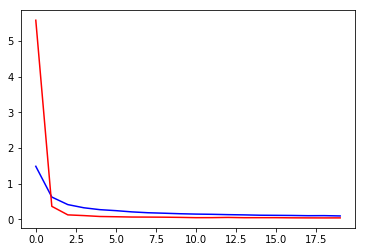

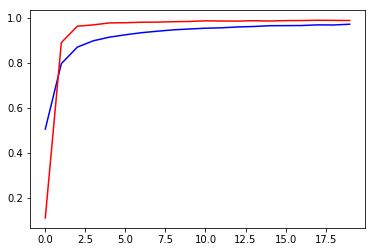

In [17]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

accuracy_score: 0.987857142857
[[370   0   0   0   0   0   2   0   1   0]
 [  0 467   0   0   0   0   0   1   1   0]
 [  0   2 411   0   0   1   0   1   0   0]
 [  0   0   0 441   0   2   0   4   2   0]
 [  0   4   0   0 430   0   2   1   0   6]
 [  0   0   0   0   0 384   1   0   0   1]
 [  1   0   0   0   1   0 439   0   0   0]
 [  2   1   1   0   0   0   0 393   0   3]
 [  1   0   1   0   2   0   0   0 408   3]
 [  1   0   0   0   2   0   0   0   0 406]]
count: 51
(51,)


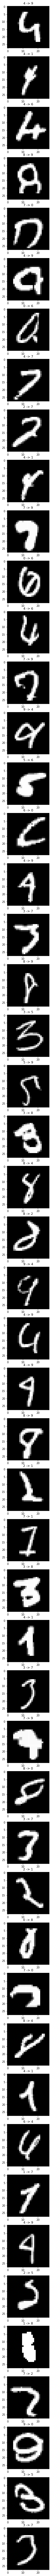

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score
def show_diffs(model, x_data, y_data, labels):
    y_hat = model.predict(x_data)
    y_pred = np.argmax(y_hat, axis=1)
    y_true = np.argmax(y_data, axis=1)
    print('accuracy_score: %s' % accuracy_score(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred, labels)
    print(cm)
    indexes = []
    diffs = []
    for i, p in enumerate(zip(y_true, y_pred)):
        if p[0] != p[1]:
            indexes.append(i)
            diffs.append(p)
    count = len(indexes)
    print('count: %s' % count)
    figs, axes = plt.subplots(count, 1, figsize=(count,180))
    print(axes.shape)
    for i, p in enumerate(diffs):
        axes[i].imshow(x_val[indexes[i]].reshape(28, 28), cmap='gray')
        axes[i].set_title('%s -> %s' % (p[0], p[1]))
        
show_diffs(model, x_val, y_val, labels=list(range(0, 10)))

## Predict

In [19]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [20]:
import time
import os

project_name = 'Digit_Recognizer'
step_name = 'Predict'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
final_acc_str = str(int(final_acc*10000))
run_name = project_name + '_' + step_name + '_' + time_str + '_' + final_acc_str
print(run_name)
cwd = os.getcwd()
output_file = os.path.join(cwd, 'output', run_name + '.csv')
print(output_file)

Digit_Recognizer_Predict_20180114_144441_9878
D:\Kaggle\digit-recognizer\output\Digit_Recognizer_Predict_20180114_144441_9878.csv


In [21]:
y_hat = model.predict(x_test, batch_size=64)

In [22]:
y_pred = np.argmax(y_hat,axis=1)

In [23]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

In [24]:
print('Done!')

Done!
